<a href="https://colab.research.google.com/github/JayYongjaeKim/MoLab/blob/main/%EC%8B%A0%EC%9A%A9%EA%B1%B0%EB%9E%98_%EC%9D%B4%EC%83%81%ED%83%90%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MoLab/fraud.csv')

# 1. 데이터 확인

> - 가독성 향상(merchant fraud제거, category pos제거, unix_time 변경)
> - 컬럼 사용성 향상(이름, 성 합치기, 주소지 합치기 및 기존 컬럼 드랍)
> - 최종 데이터 요약

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [6]:
pd.set_option('display.max_columns', None)
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [40]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [29]:
#가독성을 위해 fraud 제거
df['merchant'].value_counts()
df['merchant'].str.split('_').str[0].nunique()
df['merchant'] = df['merchant'].str.split('_').str[1]

print(df['merchant'])

0              Heller, Gutmann and Zieme
1            Schultz, Simonis and Little
2                            Kling-Grant
3                        Deckow-O'Conner
4                       Balistreri-Nader
                       ...              
491129                 Botsford and Sons
491130    Baumbach, Hodkiewicz and Walsh
491131                    Hoppe-Parisian
491132                         Rau-Robel
491133                       Dare-Marvin
Name: merchant, Length: 491134, dtype: object


In [48]:
df['category'] = df['category'].str.split('_').str[0]
print(df['category'])

0               grocery
1               grocery
2               grocery
3               grocery
4                  misc
              ...      
491129             home
491130         shopping
491131             kids
491132             kids
491133    entertainment
Name: category, Length: 491134, dtype: object


In [30]:
#가독성을 위해 unixtime 변경
# import datetime
# df['unix_time'] = df['unix_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
# print(df['unix_time'])

#trans_date 컬럼과 비교
date_col = df[['unix_time', 'trans_date_trans_time']]
print(date_col)

#trans = 거래일, unix_time 데이터 알수없음(?)

                 unix_time trans_date_trans_time
0      2012-01-01 00:00:44   2019-01-01 00:00:44
1      2012-01-01 00:12:34   2019-01-01 00:12:34
2      2012-01-01 00:17:16   2019-01-01 00:17:16
3      2012-01-01 00:20:15   2019-01-01 00:20:15
4      2012-01-01 00:23:41   2019-01-01 00:23:41
...                    ...                   ...
491129 2013-12-31 23:56:48   2020-12-31 23:56:48
491130 2013-12-31 23:56:57   2020-12-31 23:56:57
491131 2013-12-31 23:59:09   2020-12-31 23:59:09
491132 2013-12-31 23:59:15   2020-12-31 23:59:15
491133 2013-12-31 23:59:34   2020-12-31 23:59:34

[491134 rows x 2 columns]


In [32]:
#성이름 결합
# df['name'] = df['first'] + ' '+df['last']
# print(df['name'])

#성, 이름 drop
df = df.drop(['first', 'last'], axis=1)
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill
1,2019-01-01 00:12:34,4956828990005111019,"Schultz, Simonis and Little",grocery_pos,44.71,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,2012-01-01 00:12:34,40.079588,-74.848087,0,Kenneth Robinson
2,2019-01-01 00:17:16,180048185037117,Kling-Grant,grocery_net,46.28,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,2012-01-01 00:17:16,40.021888,-74.228188,0,Mary Wall
3,2019-01-01 00:20:15,374930071163758,Deckow-O'Conner,grocery_pos,64.09,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,2012-01-01 00:20:15,42.360426,-83.552316,0,Daniel Escobar
4,2019-01-01 00:23:41,2712209726293386,Balistreri-Nader,misc_pos,25.58,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,2012-01-01 00:23:41,29.737426,-90.853194,0,Jenna Brooks


In [36]:
# 주소 결합
# df['address'] = df['street'] + '_' + df['city'] + '_' + df['state'] + '_' + df['zip'].astype(str)
# print(df['address'])
# 기존 컬럼 드랍
# df = df.drop(['street', 'city', 'state', 'zip'], axis=1)
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160
1,2019-01-01 00:12:34,4956828990005111019,"Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,2012-01-01 00:12:34,40.079588,-74.848087,0,Kenneth Robinson,269 Sanchez Rapids_Elizabeth_NJ_7208
2,2019-01-01 00:17:16,180048185037117,Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,2012-01-01 00:17:16,40.021888,-74.228188,0,Mary Wall,2481 Mills Lock_Plainfield_NJ_7060


In [41]:
df.describe()

#2020년 1년 한해 동안 발생한 사기여부 거래 탐지 데이터

,trans_date_trans_time,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,491134,4.911340e+05,491134.000000,491134.000000,491134.000000,4.911340e+05,491134,491134.000000,491134.000000,491134.000000
mean,2020-01-21 13:08:50.095035392,3.706013e+17,69.050120,37.931230,-90.495619,1.213922e+05,2013-01-21 01:06:16.693315840,37.930272,-90.495411,0.002533
min,2019-01-01 00:00:44,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,2012-01-01 00:00:44,23.655789,-123.345106,0.000000
25%,2019-07-23 23:47:48.249999872,2.131124e+14,8.960000,33.746700,-97.235100,1.228000e+03,2012-07-23 23:47:48.249999872,33.781388,-96.984814,0.000000
50%,2020-01-03 23:43:34.500000,3.531130e+15,42.170000,38.507200,-87.591700,5.760000e+03,2013-01-03 23:43:34.500000,38.545124,-87.573441,0.000000
75%,2020-07-24 00:30:18.500000,4.653879e+15,80.330000,41.520500,-80.731000,5.083500e+04,2013-07-24 00:30:18.500000,41.624294,-80.685567,0.000000
max,2020-12-31 23:59:34,4.956829e+18,25086.940000,48.887800,-69.965600,2.906700e+06,2013-12-31 23:59:34,49.887523,-68.965624,1.000000
std,NaN,1.260229e+18,160.322867,5.341193,12.990732,3.725751e+05,NaN,5.372986,13.004100,0.050264


In [46]:
fraud_rate = round(sum(df['is_fraud']==1) / len(df['is_fraud'])*100, 2)

fraud_amt = round(sum(df[df['is_fraud']==1]['amt']) / sum(df['amt'])*100, 2)

print("사기 거래수:", fraud_rate)
print("사기 거래금액:", fraud_amt)

#2020년 1년 한해 동안 발생한 거래 수 중 0.25%의 거래는 사기이며 1.75%의 금액이 전체 금액에서 사기로 발생한 금액에 해당됨
#사기거래의 피쳐엔지니어링 작업을 통한 분류 분석

사기 거래수 : 0.25
사기 거래금액 : 1.75


# 2.데이터 정제

> - null, 이상치, 중복값 제거

In [47]:
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160
1,2019-01-01 00:12:34,4956828990005111019,"Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,2012-01-01 00:12:34,40.079588,-74.848087,0,Kenneth Robinson,269 Sanchez Rapids_Elizabeth_NJ_7208
2,2019-01-01 00:17:16,180048185037117,Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,2012-01-01 00:17:16,40.021888,-74.228188,0,Mary Wall,2481 Mills Lock_Plainfield_NJ_7060
3,2019-01-01 00:20:15,374930071163758,Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,2012-01-01 00:20:15,42.360426,-83.552316,0,Daniel Escobar,61390 Hayes Port_Romulus_MI_48174
4,2019-01-01 00:23:41,2712209726293386,Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,2012-01-01 00:23:41,29.737426,-90.853194,0,Jenna Brooks,50872 Alex Plain Suite 088_Baton Rouge_LA_70808


In [49]:
#null 확인 및 제거

df.isna().sum()
# 없음

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
lat,0
long,0
city_pop,0
job,0


In [52]:
#중복값 확인 및 제거

df.duplicated().sum()
#없음

0

In [62]:
#이상치 확인 및 제거 (연령데이터)
df['dob'].min()
df['dob'].max()

#없음

'2004-12-30'

# 3. 피쳐데이터 생성

> - 거래 시간, 요일,  월 데이터(1년치 데이터로 year는 불필요)
> - 거래 금액 데이터(범주 quantile)
> - 거래 발생 지역 데이터(범주 quantile)*인구 수로 구분

In [65]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160
1,2019-01-01 00:12:34,4956828990005111019,"Schultz, Simonis and Little",grocery,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,2012-01-01 00:12:34,40.079588,-74.848087,0,Kenneth Robinson,269 Sanchez Rapids_Elizabeth_NJ_7208
2,2019-01-01 00:17:16,180048185037117,Kling-Grant,grocery,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,2012-01-01 00:17:16,40.021888,-74.228188,0,Mary Wall,2481 Mills Lock_Plainfield_NJ_7060


In [72]:
#요일데이터 생성

df['trans_day'] = df['trans_date_trans_time'].dt.day_name()
df.head(1) #2019-01-01 = 화요일

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,trans_day
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160,Tuesday


In [73]:
df[df['is_fraud']==1]['trans_day'].value_counts()
#월요일과 수요일 비교

,count
trans_day,
Monday,258
Sunday,210
Saturday,177
Tuesday,174
Thursday,168
Friday,143
Wednesday,114


In [74]:
#월데이터 생성
df['trans_month'] = df['trans_date_trans_time'].dt.month_name()
df.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,trans_day,trans_month
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160,Tuesday,January


In [75]:
df[df['is_fraud']==1]['trans_month'].value_counts()
#6월과 8월비교

,count
trans_month,
August,163
January,160
June,144
May,136
December,117
February,113
September,102
November,77
March,74


In [79]:
#시간데이터 생성
df['trans_time'] = df['trans_date_trans_time'].dt.hour
df.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,trans_day,trans_month,trans_time
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160,Tuesday,January,0


In [93]:
#금액 범주 생성
print(df['amt'].describe())

#각 범주별 구분 필요 25%, 50%, 75%

count    491134.000000
mean         69.050120
std         160.322867
min           1.000000
25%           8.960000
50%          42.170000
75%          80.330000
max       25086.940000
Name: amt, dtype: float64


In [101]:
labels = [i for i in range(10)]
df['range_amt'] = pd.qcut(df['amt'], 10, labels=labels)
df['range_amt']

,range_amt
0,8
1,5
2,5
3,6
4,3
...,...
491129,8
491130,3
491131,8
491132,7


In [105]:
df['range_amt'].value_counts()

,count
range_amt,
1,49186
0,49158
6,49148
4,49113
5,49112
9,49112
8,49101
7,49092
3,49091


In [106]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,trans_day,trans_month,trans_time,range_amt
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160,Tuesday,January,0,8
1,2019-01-01 00:12:34,4956828990005111019,"Schultz, Simonis and Little",grocery,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,2012-01-01 00:12:34,40.079588,-74.848087,0,Kenneth Robinson,269 Sanchez Rapids_Elizabeth_NJ_7208,Tuesday,January,0,5
2,2019-01-01 00:17:16,180048185037117,Kling-Grant,grocery,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,2012-01-01 00:17:16,40.021888,-74.228188,0,Mary Wall,2481 Mills Lock_Plainfield_NJ_7060,Tuesday,January,0,5


In [109]:
df['amt'].groupby(df['range_amt']).mean()

<ipython-input-109-f5143628e432>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['amt'].groupby(df['range_amt']).mean()


,amt
range_amt,
0,2.362428
1,5.529567
2,9.179368
3,19.566160
4,34.617051
5,49.132945
6,63.089775
7,80.932649
8,116.868629


In [111]:
# 지역 구분 데이터 (인구수 기준)

df['range_pop'] = pd.qcut(df['city_pop'], 10 , labels = labels)
df['range_pop'].value_counts()

,count
range_pop,
0,52556
7,50355
4,50348
3,49612
6,48880
8,48169
5,48165
9,48161
1,47451


In [112]:
df['city_pop'].groupby(df['range_pop']).mean()

<ipython-input-112-9ce8e5f3858a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['city_pop'].groupby(df['range_pop']).mean()


,city_pop
range_pop,
0,176.674195
1,664.877389
2,1288.380821
3,2377.098867
4,4742.132617
5,7133.552455
6,22275.597259
7,54749.390766
8,162570.554589


#4. 피쳐 데이터 활용

> - 피쳐 데이터별 fraud 거래 확인

In [113]:
df.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,trans_day,trans_month,trans_time,range_amt,range_pop
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160,Tuesday,January,0,8,0


In [126]:
# 시간대별 fraud 거래 발생 확인

fraud_time = df[df['is_fraud']==1]['trans_time'].value_counts()
fraud_time

,count
trans_time,
22,260
23,240
3,150
2,142
0,132
1,125
7,20
5,17
13,16


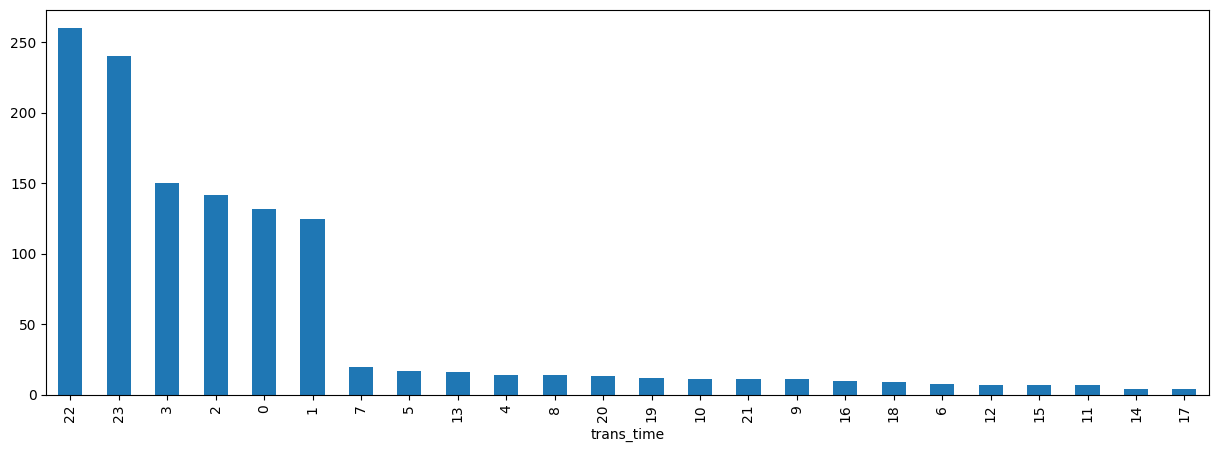

In [127]:
import matplotlib.pyplot as plt

fraud_time.plot(kind = 'bar', figsize=(15,5))
plt.show()

#늦은 새벽시간때 발생

In [128]:
#요일별 fraud 거래 발생 확인

fraud_day = df[df['is_fraud']==1]['trans_day'].value_counts(ascending=False)
fraud_day

,count
trans_day,
Monday,258
Sunday,210
Saturday,177
Tuesday,174
Thursday,168
Friday,143
Wednesday,114


<function matplotlib.pyplot.show(close=None, block=None)>

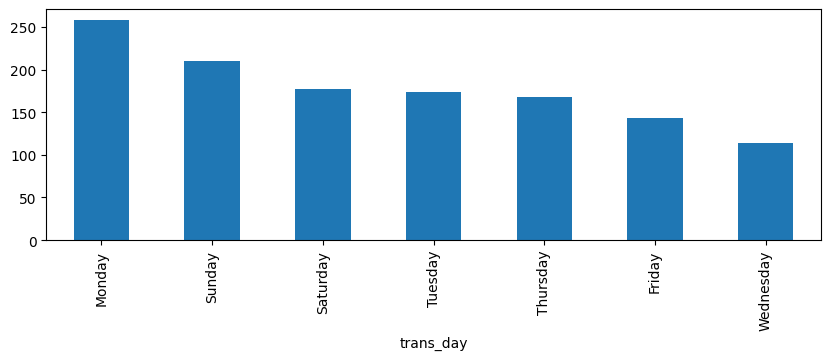

In [132]:
fraud_day.plot(kind = 'bar', figsize=(10,3))
plt.show

#월요일에 많이 발생

In [136]:
#월별 fraud 거래 발생 확인

fraud_month = df[df['is_fraud']==1]['trans_month'].value_counts(ascending=False)
fraud_month

,count
trans_month,
August,163
January,160
June,144
May,136
December,117
February,113
September,102
November,77
March,74


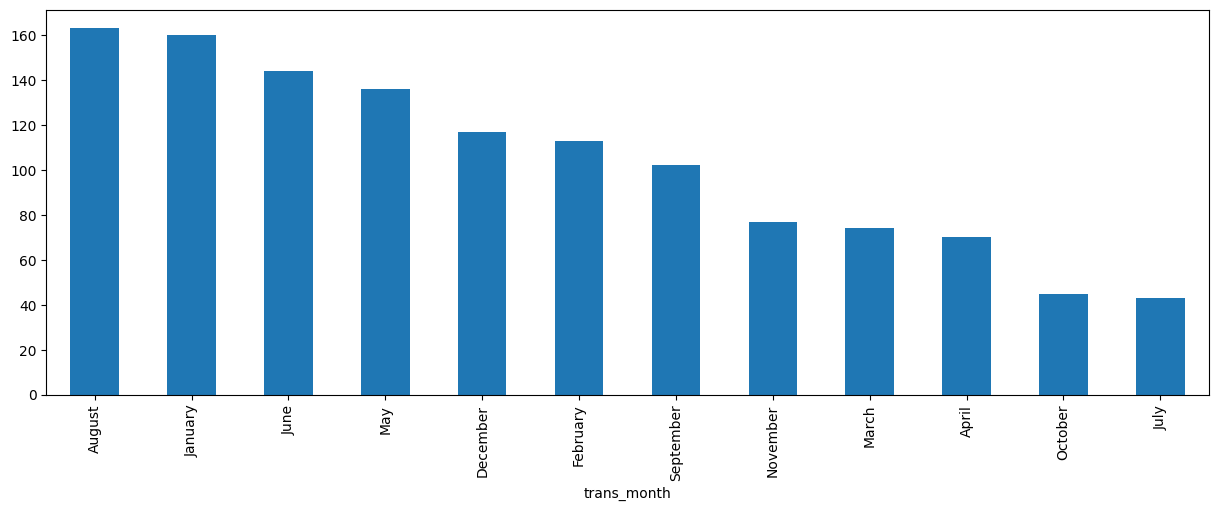

In [137]:
fraud_month.plot(kind = 'bar', figsize=(15,5))
plt.show()

#여름에 많이 발생

In [151]:
amt_time = df[df['is_fraud']==1]['trans_time'].groupby(df['range_amt']).value_counts(ascending=True)
amt_time_pivot= amt_time.unstack(fill_value=0)
amt_time_pivot

<ipython-input-151-aee8e61e6cf2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_time = df[df['is_fraud']==1]['trans_time'].groupby(df['range_amt']).value_counts(ascending=True)


trans_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
range_amt,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,22,17,28,24,3,3,0,3,3,1,1,2,0,1,0,1,0,0,1,0,1,1,15,12
3,3,2,2,0,2,1,0,0,0,0,0,0,2,3,2,0,3,2,1,4,2,1,73,73
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,4,6,2,1,1,1,1,0,1,0,1,0,3,0,1,1,1,0,3,0,0,15,15


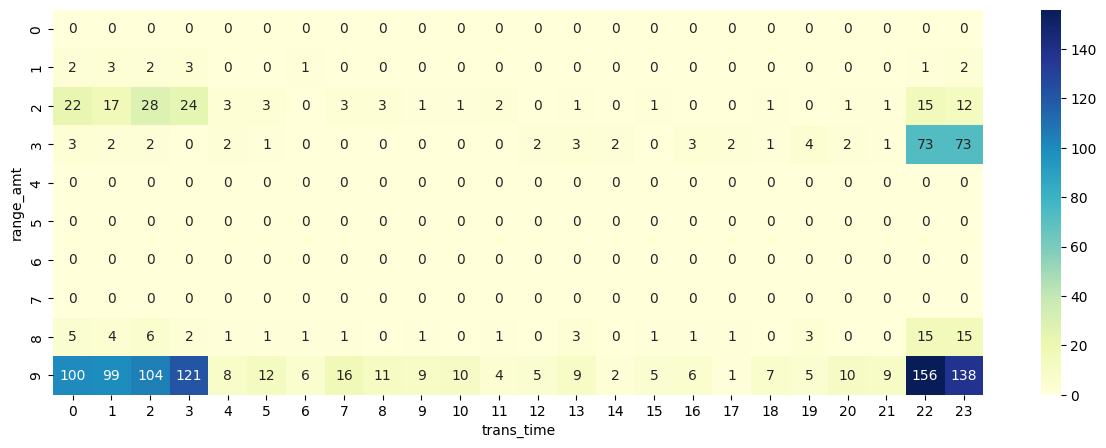

In [153]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(amt_time_pivot,cmap='YlGnBu', annot=True, fmt='d')
plt.show()

#amt에 따른 시간별 fraud 데이터 확인시 저등급인 2,3등급과 고등급인 9등급에서 대부분이 발생하였으며 그외에는 0으로 찍힘
#amt 카운트 확인 후 안 도출

In [150]:
amt_day = df[df['is_fraud']==1]['trans_day'].groupby(df['range_amt']).value_counts(ascending=True)
amt_day_pivot = amt_day.unstack(fill_value=0)
amt_day_pivot

<ipython-input-150-a33baf59a794>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_day = df[df['is_fraud']==1]['trans_day'].groupby(df['range_amt']).value_counts(ascending=True)


trans_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
range_amt,,,,,,,
0,0,0,0,0,0,0,0
1,2,4,3,2,1,1,1
2,9,40,18,30,18,16,8
3,22,29,26,32,22,28,17
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,9,13,10,9,9,8,4


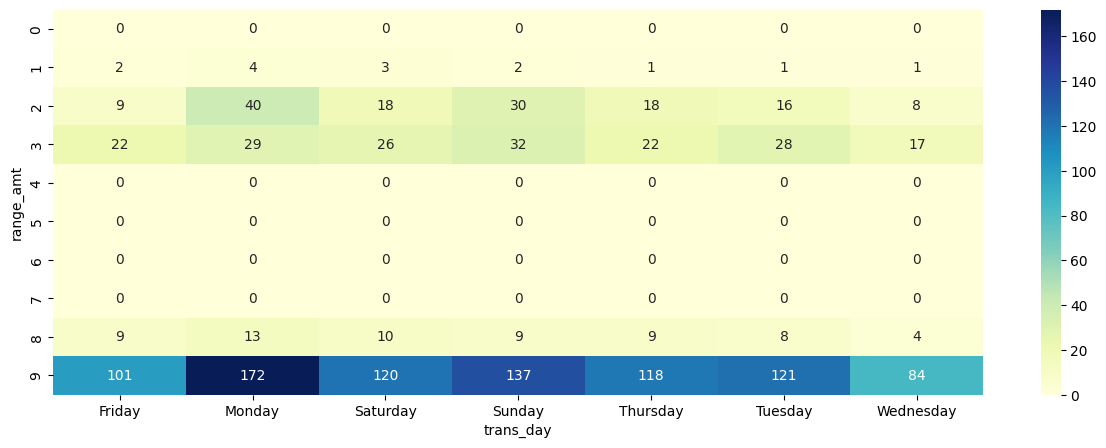

In [154]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(amt_day_pivot,cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [157]:
amt_month = df[df['is_fraud']==1]['trans_month'].groupby(df['range_amt']).value_counts(ascending=True)
amt_month_pivot = amt_month.unstack(fill_value=0)
amt_month_pivot

<ipython-input-157-7f131915be95>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_month = df[df['is_fraud']==1]['trans_month'].groupby(df['range_amt']).value_counts(ascending=True)


trans_month,April,August,December,February,January,July,June,March,May,November,October,September
range_amt,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3,0,0,1,2,1,0,3,1,0,2
2,8,18,7,7,18,4,21,9,18,14,4,11
3,7,32,13,12,20,4,27,9,22,7,7,16
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,4,15,2,5,7,2,5,3,2,6,3,8


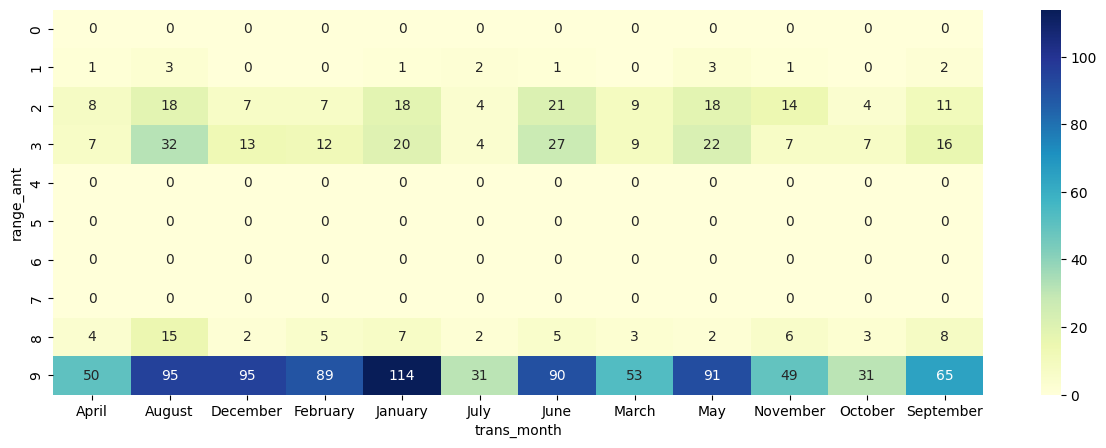

In [158]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(amt_month_pivot,cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [167]:
amt_pop = df[df['is_fraud']==1]['range_pop'].groupby(df['range_amt']).value_counts(ascending=True)
amt_pop_pivot = amt_pop.unstack(fill_value=0)
amt_pop_pivot

<ipython-input-167-395456fa841e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_pop = df[df['is_fraud']==1]['range_pop'].groupby(df['range_amt']).value_counts(ascending=True)


range_pop,0,1,2,3,4,5,6,7,8,9
range_amt,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,3,2,5,2,0,1
2,14,19,13,13,16,9,19,11,14,11
3,22,24,28,22,18,9,15,15,10,13
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,8,8,6,4,13,8,2,6,2,5


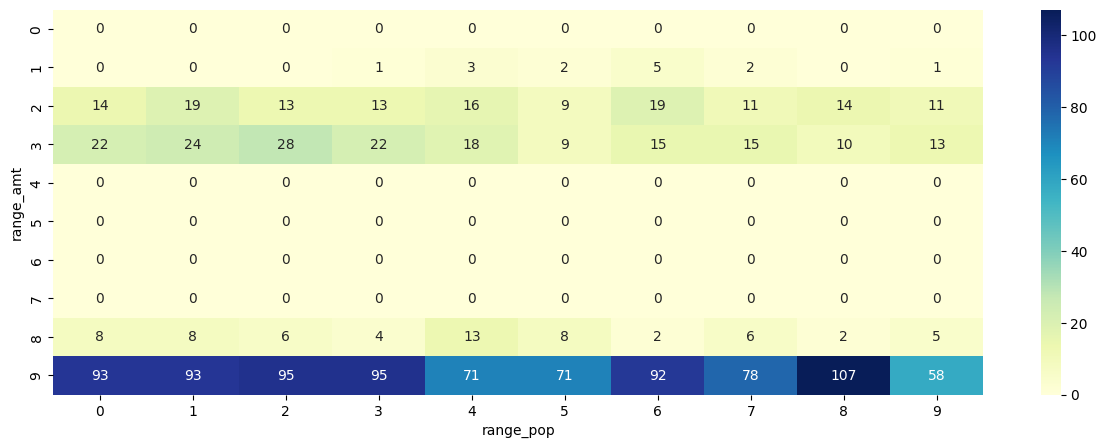

In [168]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(amt_pop_pivot,cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [160]:
df[df['is_fraud']==1]['range_amt'].value_counts()
# 전체 고루 등급이 퍼져있지만 fraud가 발견된건 역시나 고등급 혹은 저등급에서만 발생 ( * 9등급, 3등급, 2등급)  특히 9등급 ,
# 이상치의 대부분은 주로 대도시(인구수가많은) 여름 늦은시간에 발생하며 높은 금액대라는 인사이트 도출

,count
range_amt,
9,853
3,176
2,139
8,62
1,14
0,0
4,0
5,0
6,0


# 5. 추가 분석

> - 유클리디안거리 활용하여 구매자의 위치와 상점의 위치 근접도 확인
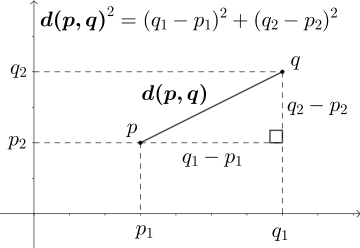

In [166]:
df.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,trans_day,trans_month,trans_time,range_amt,range_pop
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160,Tuesday,January,0,8,0


In [190]:
import math
def distance(a1,b1,a2,b2):
  return math.sqrt((a1-a2)**2 + (b1-b2)**2)

df['u_distance'] = df.apply(lambda x : distance(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)
df['u_distance']

,u_distance
0,0.272310
1,0.862420
2,0.622027
3,0.239327
4,0.730752
...,...
491129,0.990794
491130,1.217523
491131,0.971537
491132,0.935280


In [191]:
df['u_distance'].describe()

,u_distance
count,491134.000000
mean,0.765754
std,0.284629
min,0.001429
25%,0.564938
50%,0.798297
75%,0.977184
max,1.413356


In [192]:
fraud_d = df[df['is_fraud']==1]['u_distance'].mean()
not_fraud_d = df[df['is_fraud']==0]['u_distance'].mean()
print(fraud_d, not_fraud_d)

0.7687455276195021 0.7657461043692237


In [193]:
amt_fraud_d = df[(df['is_fraud']==1) & (df['range_amt']==9)]['u_distance'].mean()
amt_not_fraud_d = df[(df['is_fraud']==0) & (df['range_amt']==9)]['u_distance'].mean()
print(amt_fraud_d, amt_not_fraud_d)

0.7625551691591896 0.7651132007808723


In [196]:
#거리를 등급화할 필요가 있어보임

df['u_distance'] = pd.qcut(df['u_distance'], 10, labels=labels)
df['u_distance'].value_counts()

,count
u_distance,
0,49114
3,49114
6,49114
9,49114
1,49113
2,49113
4,49113
5,49113
7,49113


In [197]:
fraud_d_amt = df[df['is_fraud']==1]['u_distance'].groupby(df['range_amt']).value_counts()
fraud_d_amt_pivot = fraud_d_amt.unstack(fill_value = 0)

<ipython-input-197-dc1b1b155204>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_d_amt = df[df['is_fraud']==1]['u_distance'].groupby(df['range_amt']).value_counts()


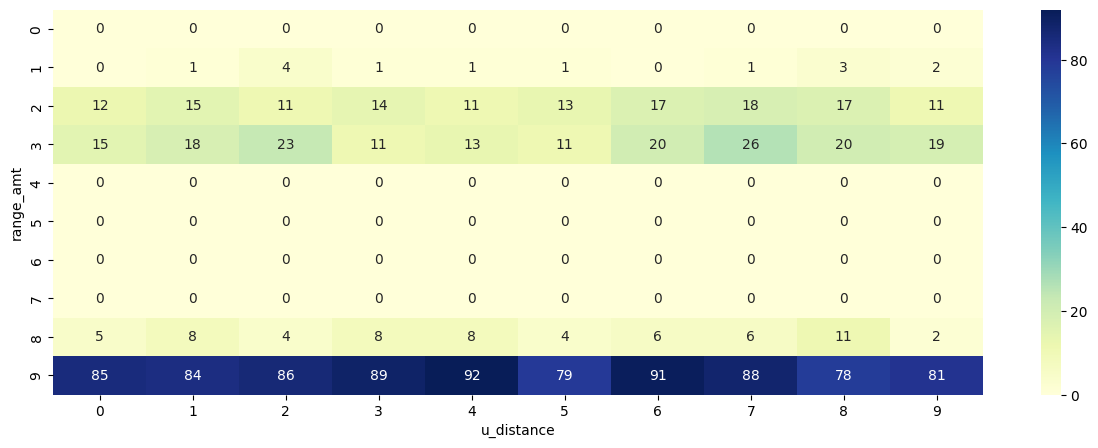

In [198]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(fraud_d_amt_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

#거리에 따른 특이사항은 없어보임

# 6. 종합 기본 카테고리별 fraud 수치

In [199]:
df.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,trans_day,trans_month,trans_time,range_amt,range_pop,u_distance
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160,Tuesday,January,0,8,0,0


In [239]:
fraud_category = df[df['is_fraud']==1]['category'].value_counts()
fraud_age = df[df['is_fraud']==1]['dob'].str.split('-').str[0].str[:3].value_counts()
fraud_job = df[df['is_fraud']==1]['job'].value_counts()
fraud_gender = df[df['is_fraud']==1]['gender'].value_counts()

# print(fraud_category)    #shopping 에서 최다발생
# print(fraud_age)         #1970년대생에게서 가장 많이 발생
# print(fraud_job)         #다양한 직업군의 매칭이 어려움
# print(fraud_gender)      #여성에게서 많이 발생

job
Environmental consultant                             29
Surveyor, land/geomatics                             28
Comptroller                                          26
Immunologist                                         25
Historic buildings inspector/conservation officer    24
                                                     ..
Radiographer, therapeutic                             3
Fine artist                                           3
English as a second language teacher                  2
Contractor                                            2
Systems developer                                     2
Name: count, Length: 108, dtype: int64


In [242]:
job = pd.read_csv('/content/drive/MyDrive/MoLab/job.csv')

In [243]:
job.head(3)

,Job Title,Jobs
0,Software Engineer,Software
1,Data Analyst,Data Analyst
2,Manager,Manager


In [245]:
job.rename(columns = {'Job Title' : 'job'}, inplace = True)
job.head(3)

,job,Jobs
0,Software Engineer,Software
1,Data Analyst,Data Analyst
2,Manager,Manager


In [248]:
df_merge = df.merge(job, on='job',how='left')
df_merge['Jobs'].isna().sum()
# 매칭 안됨

491134

In [264]:
df.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,trans_day,trans_month,trans_time,range_amt,range_pop,u_distance
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,Stephanie Gill,43039 Riley Greens Suite 393_Orient_WA_99160,Tuesday,January,0,8,0,0


# 7. Fraud가 아직 0 대상중 1일 수도 있는 대상( 종합적인 결과로 1일 수도 있다는 가정)

> - 0-3시 및 21 -23시 결제
> - 월요일에 결제
> - 9월 ~ 12월 결제
> - 1970년대 생이면서 여성
> - 고액 결제

In [269]:
sus_person =   (
                    ((df['trans_time'].between(0, 3)) | (df['trans_time'].between(21, 23)))
                     &
                    (df['trans_day'] == 'Monday')
                     &
                    (df['trans_month'].isin(['September', 'October', 'November', 'December']))
                     &
                    (df['dob'].str.split('-').str[0].str[:3] == '197')
                     &
                    (df['gender'] == 'F')
                    &
                    (df['range_amt'] ==9)
                )
sus_person_list = df[sus_person]
sus_person_list[sus_person_list['is_fraud']==0]

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,trans_day,trans_month,trans_time,range_amt,range_pop,u_distance
152969,2019-09-02 00:19:25,4792627764422477317,Miller-Hauck,grocery,183.24,F,38.9462,-94.9714,5760,Chief Executive Officer,1978-10-01,747ebfd6ad15bb2e9d94fe3cdabbe1a8,2012-09-02 00:19:25,38.000299,-95.838505,0,Margaret Mendez,7952 Karen Pike_De Soto_KS_66018,Monday,September,0,9,4,9
152978,2019-09-02 00:40:18,3521417320836166,Rau and Sons,grocery,225.00,F,39.8490,-86.2720,910148,Firefighter,1975-11-30,ca5b086a83565b3045cb2fc00529a7b7,2012-09-02 00:40:18,39.430267,-86.934488,0,Angela Hodges,08236 Kim Hill_Indianapolis_IN_46254,Monday,September,0,9,9,4
153016,2019-09-02 03:06:03,3590736522064285,Kunze Inc,grocery,202.24,F,34.5091,-92.4828,4074,"Scientist, audiological",1975-12-20,e6637042492f946507bbc9d4ccecc9c6,2012-09-02 03:06:03,33.584063,-93.327608,0,Kimberly Gonzalez,72966 Shannon Pass Apt. 391_Bauxite_AR_72011,Monday,September,3,9,4,9
153702,2019-09-02 22:01:41,3566094707272327,"Bahringer, Schoen and Corkery",shopping,613.35,F,34.3795,-118.5230,34882,Health physicist,1971-04-25,317a1f624899e73239d61873d4054448,2012-09-02 22:01:41,34.652285,-119.149634,0,Kristina Stewart,47029 Jimmy Tunnel Apt. 106_Newhall_CA_91321,Monday,September,22,9,7,3
157049,2019-09-09 00:00:56,180094419304907,Auer-Mosciski,grocery,224.19,F,33.7467,-117.1721,54287,"Designer, exhibition/display",1972-09-22,35250090b9202ee9443da0da8ff19826,2012-09-09 00:00:56,34.572962,-116.468818,0,Sharon Smith,17666 David Valleys_Sun City_CA_92585,Monday,September,0,9,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486164,2020-12-28 03:17:54,3551217896304745,"Rowe, Batz and Goodwin",grocery,215.48,F,44.2320,-74.4905,6120,Chartered loss adjuster,1976-10-09,c9ddc2150f0003c8b7adeea55d85c390,2013-12-28 03:17:54,45.069956,-75.426862,0,Sara Harris,597 Jenny Ford Apt. 543_Tupper Lake_NY_12986,Monday,December,3,9,5,9
487537,2020-12-28 21:45:15,30238755902988,Hills-Boyer,personal,197.06,F,30.5920,-97.2893,1766,Press sub,1976-01-02,0dd4924c8d5039bd116a454c3fa36bec,2013-12-28 21:45:15,29.841320,-96.412570,0,Danielle Yu,5395 Colon Burgs Suite 037_Thrall_TX_76578,Monday,December,21,9,2,9
487686,2020-12-28 23:01:42,4681601008538160,"Greenholt, O'Hara and Balistreri",shopping,500.46,F,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,b4cdc585b14747931ab52b6ec7ce05a2,2013-12-28 23:01:42,39.499805,-80.802057,0,Tammy Davis,77663 Colleen Freeway_Moundsville_WV_26041,Monday,December,23,9,6,1
487689,2020-12-28 23:03:01,6011504998544485,Pouros-Haag,shopping,399.65,F,32.5104,-86.8138,1089,Materials engineer,1971-11-02,0d588db13c866d73259a840ba0acba03,2013-12-28 23:03:01,32.172230,-87.463216,0,Ashley Whitney,4038 Smith Avenue_Jones_AL_36749,Monday,December,23,9,2,4


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


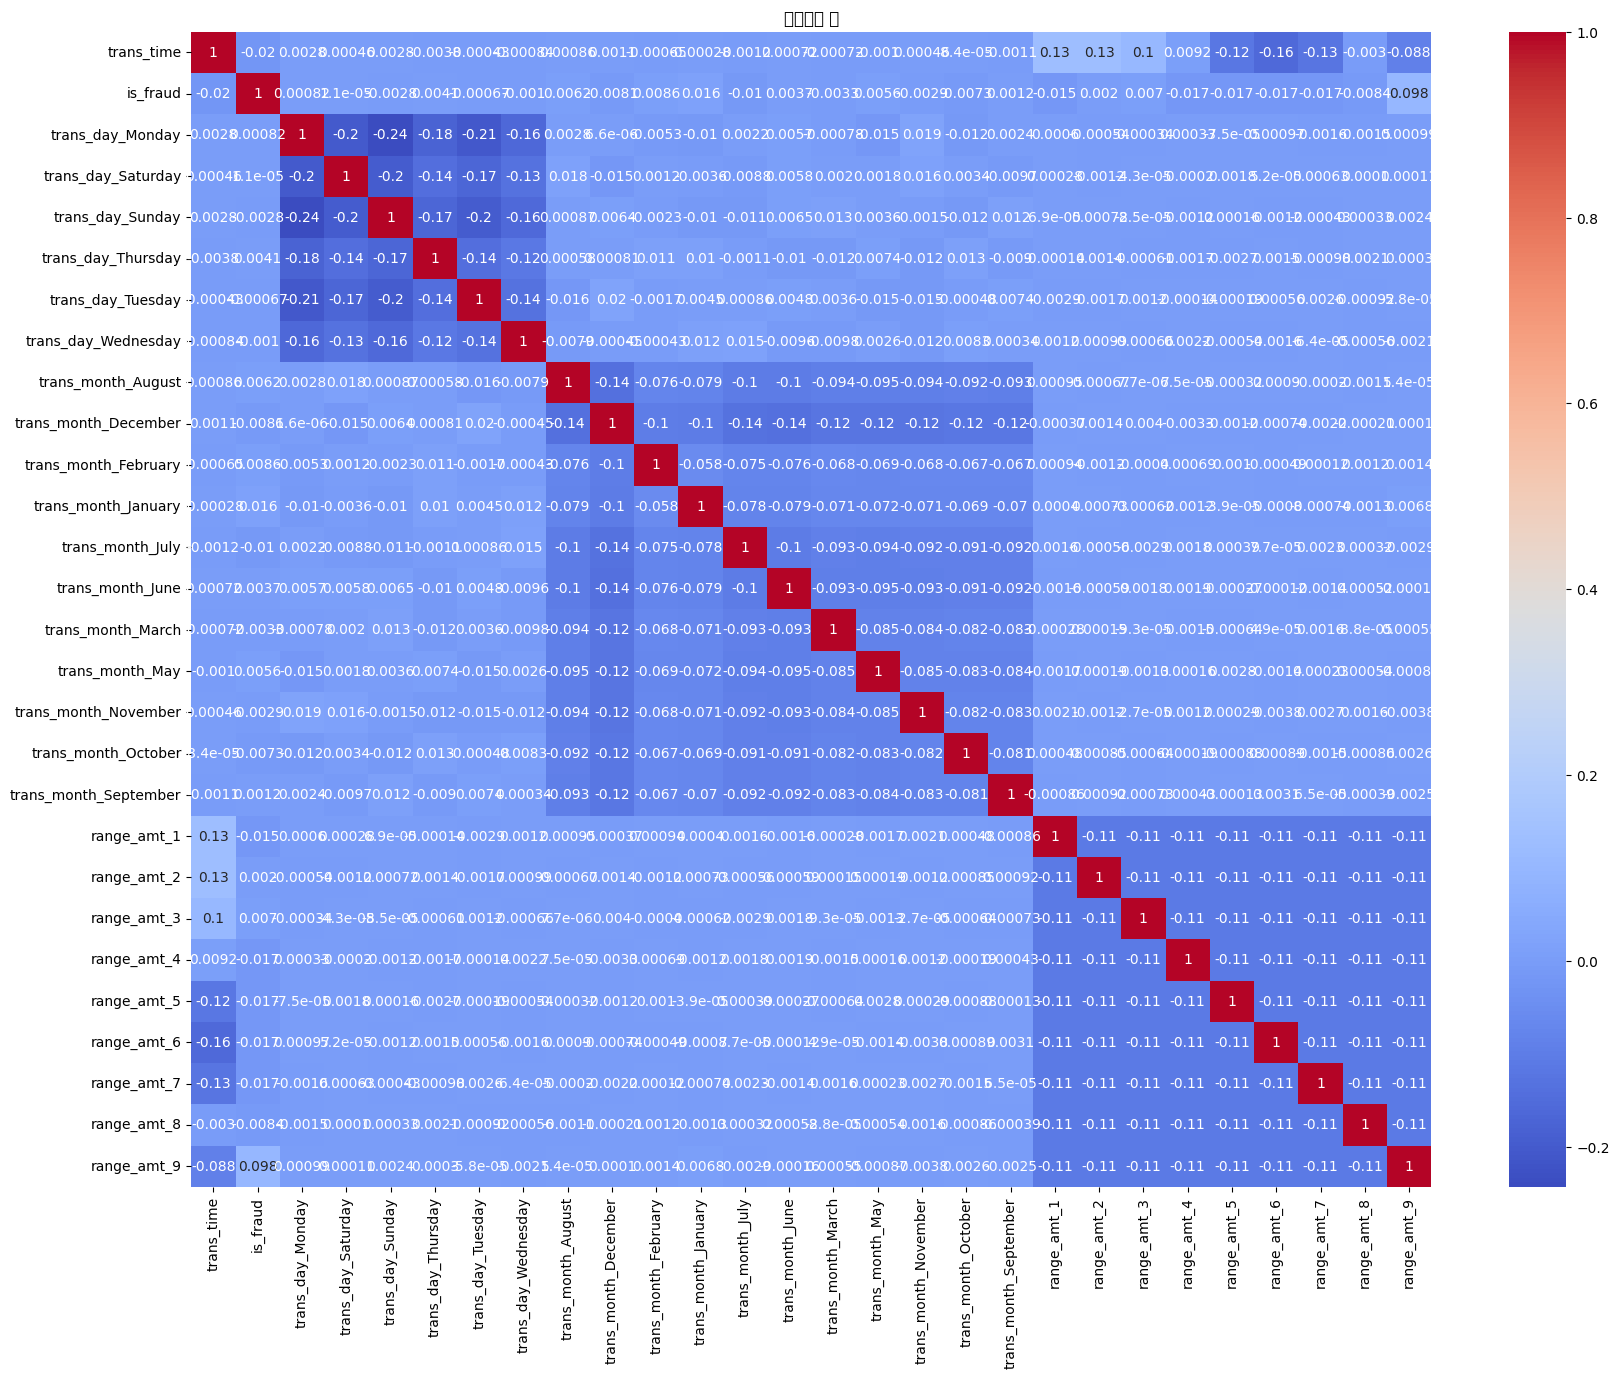

In [280]:
# corr_list = df[['trans_time', 'trans_day', 'trans_month', 'range_amt', 'is_fraud']]
# corr_list = pd.get_dummies(corr_list, drop_first=True)


import seaborn as sns
import matplotlib.pyplot as plt


corr_list = df[['trans_time', 'trans_day', 'trans_month', 'range_amt', 'is_fraud']]
corr_list = pd.get_dummies(corr_list, drop_first=True)


plt.figure(figsize=(20, 15))
sns.heatmap(corr_list.corr(), annot=True, cmap='coolwarm')
plt.title("상관관계 표")
plt.show()